## Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style
import joblib
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category= ConvergenceWarning)

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Data Analysis

In [4]:
main_df= pd.read_csv('raw_data/train.csv')
main_df.head(10)

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.25000,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299,Paid in full
5,1900,7491,677.0,A,150000.0,50.0,654.0,A,150000.0,50.0,...,407304.50000,NaN,preferred,NaN,665.0,A,150000.0,100.0,6518,Default
6,1885,9464,601.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,78771.70000,NaN,preferred,NaN,601.0,B,100000.0,100.0,7777,Default
7,108,562,525.0,C,35000.0,100.0,NaN,NaN,NaN,NaN,...,20348.33333,NaN,preferred,NaN,525.0,C,35000.0,100.0,486,Paid off with renewal
8,951,6715,588.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,15947.66667,NaN,preferred,NaN,588.0,B,100000.0,100.0,5972,Paid off with renewal
9,1335,3257,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,...,0.00000,NaN,preferred,NaN,0.0,NaN,NaN,0.0,3435,Paid off with renewal


In [5]:
shape = main_df.shape
print ("Shape Of data :", shape )
max_length = max([len(column) for column in main_df.columns])
for column in main_df.columns:
    n_miss = main_df[column].isnull().sum()
    perc = n_miss / main_df.shape[0] * 100
    print(f'{column: <{max_length}}   Missing: {n_miss: <4}   ({perc:.1f}%)')


Shape Of data : (1537, 56)
Unnamed: 0                                 Missing: 0      (0.0%)
id                                         Missing: 0      (0.0%)
owner_1_score                              Missing: 21     (1.4%)
RATE_owner_1                               Missing: 27     (1.8%)
CAP_AMOUNT_owner_1                         Missing: 31     (2.0%)
PERCENT_OWN_owner_1                        Missing: 13     (0.8%)
owner_2_score                              Missing: 1352   (88.0%)
RATE_owner_2                               Missing: 1352   (88.0%)
CAP_AMOUNT_owner_2                         Missing: 1363   (88.7%)
PERCENT_OWN_owner_2                        Missing: 1313   (85.4%)
owner_3_score                              Missing: 1530   (99.5%)
RATE_owner_3                               Missing: 1530   (99.5%)
CAP_AMOUNT_owner_3                         Missing: 1530   (99.5%)
PERCENT_OWN_owner_3                        Missing: 1504   (97.9%)
years_in_business                        

In [6]:
shape =main_df.shape
print ("Shape Of data :", shape )
main_df.isna().sum()

Shape Of data : (1537, 56)


Unnamed: 0                                     0
id                                             0
owner_1_score                                 21
RATE_owner_1                                  27
CAP_AMOUNT_owner_1                            31
PERCENT_OWN_owner_1                           13
owner_2_score                               1352
RATE_owner_2                                1352
CAP_AMOUNT_owner_2                          1363
PERCENT_OWN_owner_2                         1313
owner_3_score                               1530
RATE_owner_3                                1530
CAP_AMOUNT_owner_3                          1530
PERCENT_OWN_owner_3                         1504
years_in_business                             12
RATE_ID_FOR_years_in_business                 12
fsr                                          417
RATE_ID_FOR_fsr                             1522
location                                      10
RATE_ID_FOR_location                          64
funded_last_30      

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1537 non-null   int64  
 1   id                                        1537 non-null   int64  
 2   owner_1_score                             1516 non-null   float64
 3   RATE_owner_1                              1510 non-null   object 
 4   CAP_AMOUNT_owner_1                        1506 non-null   float64
 5   PERCENT_OWN_owner_1                       1524 non-null   float64
 6   owner_2_score                             185 non-null    float64
 7   RATE_owner_2                              185 non-null    object 
 8   CAP_AMOUNT_owner_2                        174 non-null    float64
 9   PERCENT_OWN_owner_2                       224 non-null    float64
 10  owner_3_score                       

## Pre-Processing Data

In [8]:
# Drop columns with more than 65% null values
main_df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
for col in main_df.columns:
    pct_null = main_df[col].isnull().sum() / len(main_df) * 100
    if pct_null > 65:
        main_df.drop(col, axis=1, inplace=True)

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

mean_values = {}
mode_values = {}

for col in main_df.columns:
    null_percentage = main_df[col].isnull().sum() / len(main_df) * 100
    if main_df[col].dtype != 'object':
        if null_percentage > 7:
            # Fill numeric columns with mean if null percentage is greater than or equal to 7%
            mean = main_df[col].mean()
            main_df[col] = main_df[col].fillna(mean)
            mean_values[col] = mean
        else:
            # Fill numeric columns with KNN imputer
            main_df[[col]] = knn_imputer.fit_transform(main_df[[col]])
    else:
        # Fill non-numeric columns with mode
        if null_percentage > 0:
            mode = main_df[col].mode()[0]
            main_df[col] = main_df[col].fillna(mode)
            mode_values[col] = mode

# Encoding non-numeric columns
label_encoders = {}
for col in main_df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    main_df[col] = label_encoder.fit_transform(main_df[col])
    label_encoders[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print encoded values for each non-numeric column
for col, encoder_dict in label_encoders.items():
    print(f"Feature: {col}")
    for original_value, encoded_value in encoder_dict.items():
        print(f"Original Value: {original_value}, Encoded Value: {encoded_value}")
    print("\n")

Feature: RATE_owner_1
Original Value: A, Encoded Value: 0
Original Value: B, Encoded Value: 1
Original Value: C, Encoded Value: 2
Original Value: D, Encoded Value: 3
Original Value: R, Encoded Value: 4


Feature: RATE_ID_FOR_years_in_business
Original Value: A, Encoded Value: 0
Original Value: B, Encoded Value: 1
Original Value: C, Encoded Value: 2
Original Value: D, Encoded Value: 3


Feature: location
Original Value: BRICK, Encoded Value: 0
Original Value: Home, Encoded Value: 1
Original Value: Unknown, Encoded Value: 2
Original Value: Verified, Encoded Value: 3


Feature: RATE_ID_FOR_location
Original Value: A, Encoded Value: 0


Feature: funded_last_30
Original Value: N, Encoded Value: 0
Original Value: Y, Encoded Value: 1


Feature: RATE_ID_FOR_judgement_lien_percent
Original Value: A, Encoded Value: 0
Original Value: B, Encoded Value: 1
Original Value: C, Encoded Value: 2
Original Value: D, Encoded Value: 3


Feature: RATE_ID_FOR_judgement_lien_amount
Original Value: A, Encoded V

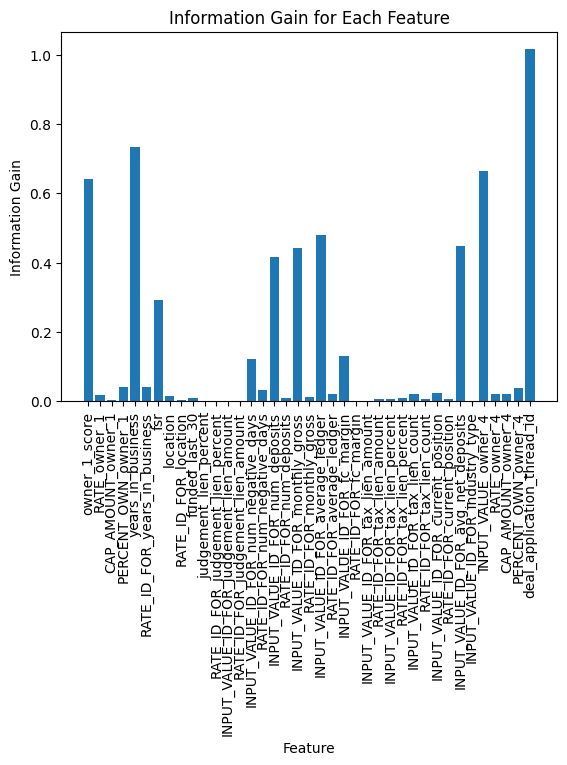

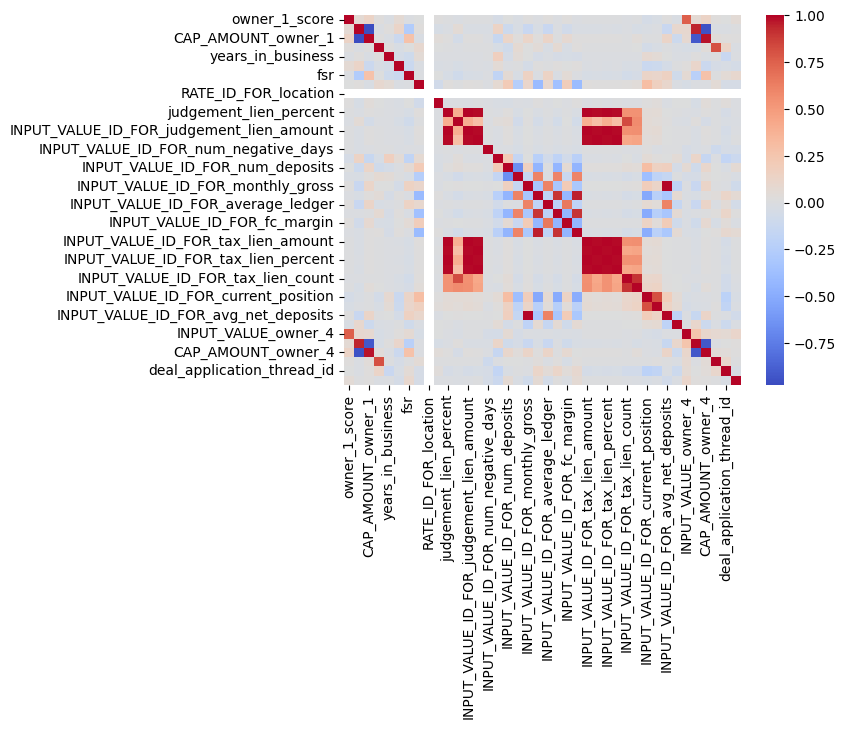

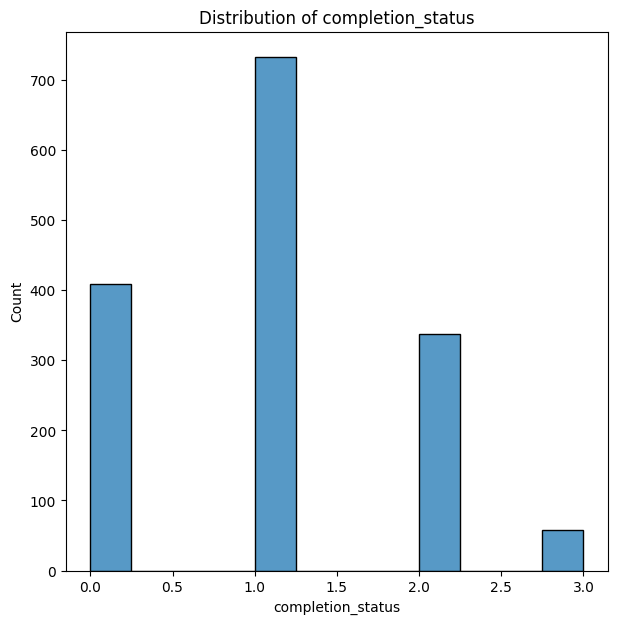

In [9]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

X = main_df.drop('completion_status', axis=1)
y = main_df['completion_status']
    
ig = mutual_info_classif(X, y)

plt.bar(X.columns, ig)

plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.title('Information Gain for Each Feature')

plt.xticks(rotation=90)
plt.show()
sns.heatmap(main_df.corr(),cmap='coolwarm')
plt.figure(figsize=(7, 7))
sns.histplot(main_df[column].dropna())
plt.title(f'Distribution of {column}')
plt.show()

In [10]:
# Calculate the correlation matrix, excluding the target column 'completion_status'
loan_corr = main_df.drop("completion_status", axis=1).corr()

# Identify columns with correlation greater than 0.1 and less than 1
high_corr = np.logical_and(loan_corr > 0.1, loan_corr < 1)

# Determine columns to retain based on the high correlation condition
columns_to_retain = set()
for row in high_corr.index:
    for col in high_corr.columns:
        if high_corr.loc[row, col]:
            columns_to_retain.add(row)
            columns_to_retain.add(col)

# Determine columns to drop based on columns that do not meet the high correlation criteria
columns_to_drop = [col for col in loan_corr.columns if col not in columns_to_retain]

# Drop identified columns from the original dataset
main_df.drop(columns=columns_to_drop, axis=1, inplace=True)

main_df.to_csv('Data_After_Pre.csv', index=False)

### Further Data Analysis after Pre-Processing

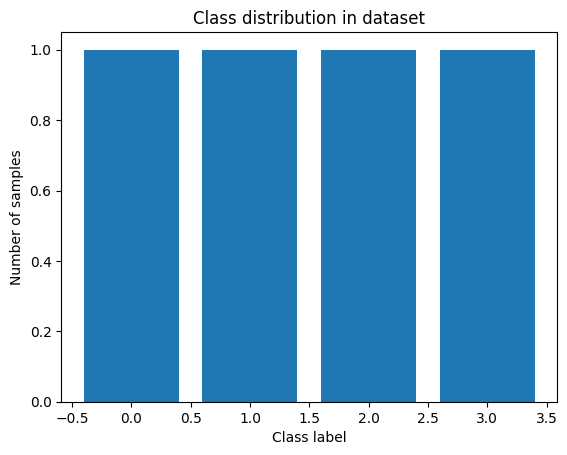

In [11]:
d = main_df["completion_status"].unique()
import matplotlib.pyplot as plt
unique_labels, counts = np.unique(d, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [12]:
shape =main_df.shape
print ("Shape Of data :", shape )
main_df.isna().sum()

Shape Of data : (1537, 37)


owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger                  0
INPUT_VALUE_ID_FOR_fc_margin                0
RATE_ID_FOR_fc_margin                       0
INPUT_VALUE_ID_FOR_tax_lien_amount

## Model Training

##### PCA (Bad Results)

In [13]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# X_nc = main_df.drop("completion_status", axis=1).copy()
# y_nc = main_df["completion_status"].copy()

# X_train, X_test, y_train, y_test = train_test_split(X_nc, y_nc, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Apply PCA
# pca = PCA(n_components=15)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

##### Model Only

In [14]:
X_nc = main_df.drop("completion_status", axis=1).copy()
y_nc = main_df["completion_status"].copy()

scaler = StandardScaler()
X_nc = scaler.fit_transform(X_nc)

X_train, X_test, y_train, y_test = train_test_split(X_nc, y_nc, test_size=0.2, random_state=42)

models = [
    xgb.XGBClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    # SVC(),
    KNeighborsClassifier(),
    LogisticRegression(),
    MLPClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sensitivity = recall
    specificity = (np.sum(np.diag(conf_matrix)) - np.sum(conf_matrix * np.eye(len(conf_matrix)))) / (np.sum(conf_matrix) - np.sum(np.diag(conf_matrix)))

    print(f"Model: {model.__class__.__name__}")
    print("Accuracy: ", round(acc * 100, 2), '%')
    print("Precision: ", round(precision * 100, 2), '%')
    print("Recall: ", round(recall * 100, 2), '%')
    print("F1 Score: ", round(f1 * 100, 2), '%')
    print("Sensitivity (Average): ", round(sensitivity * 100, 2), '%')
    print("Specificity (Average): ", round(specificity * 100, 2), '%')
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")


Model: XGBClassifier
Accuracy:  96.1 %
Precision:  96.8 %
Recall:  95.8 %
F1 Score:  96.27 %
Sensitivity (Average):  95.8 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 82   4   1   0]
 [  3 130   2   0]
 [  0   1  68   0]
 [  0   0   1  16]]


Model: GradientBoostingClassifier
Accuracy:  88.96 %
Precision:  91.64 %
Recall:  89.04 %
F1 Score:  90.2 %
Sensitivity (Average):  89.04 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 73  10   4   0]
 [  3 127   5   0]
 [  2   9  58   0]
 [  0   1   0  16]]


Model: DecisionTreeClassifier
Accuracy:  88.31 %
Precision:  89.3 %
Recall:  89.66 %
F1 Score:  89.44 %
Sensitivity (Average):  89.66 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 74  12   1   0]
 [  7 119   9   0]
 [  2   3  63   1]
 [  0   0   1  16]]


Model: RandomForestClassifier
Accuracy:  91.23 %
Precision:  93.78 %
Recall:  90.97 %
F1 Score:  92.23 %
Sensitivity (Average):  90.97 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 74  10   3   0]
 [  3 130  

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: LogisticRegression
Accuracy:  45.45 %
Precision:  36.7 %
Recall:  28.49 %
F1 Score:  24.82 %
Sensitivity (Average):  28.49 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 13  72   2   0]
 [ 14 120   1   0]
 [ 14  48   7   0]
 [  3  14   0   0]]


Model: MLPClassifier
Accuracy:  65.58 %
Precision:  72.49 %
Recall:  54.54 %
F1 Score:  58.17 %
Sensitivity (Average):  54.54 %
Specificity (Average):  0.0 %
Confusion Matrix:
 [[ 51  24  12   0]
 [ 13 115   7   0]
 [ 17  21  31   0]
 [  3   8   1   5]]




##### Model with GridSearchCV




Model: XGBClassifier
Accuracy: 97.4 %
Precision: 96.43 %
Recall: 96.92 %
F1 score: 96.66 %
Sensitivity (Average): 96.92 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 73   0   2   1]
 [  1 146   2   0]
 [  0   1  61   0]
 [  1   0   0  20]]
Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
**************************************************************
**************************************************************



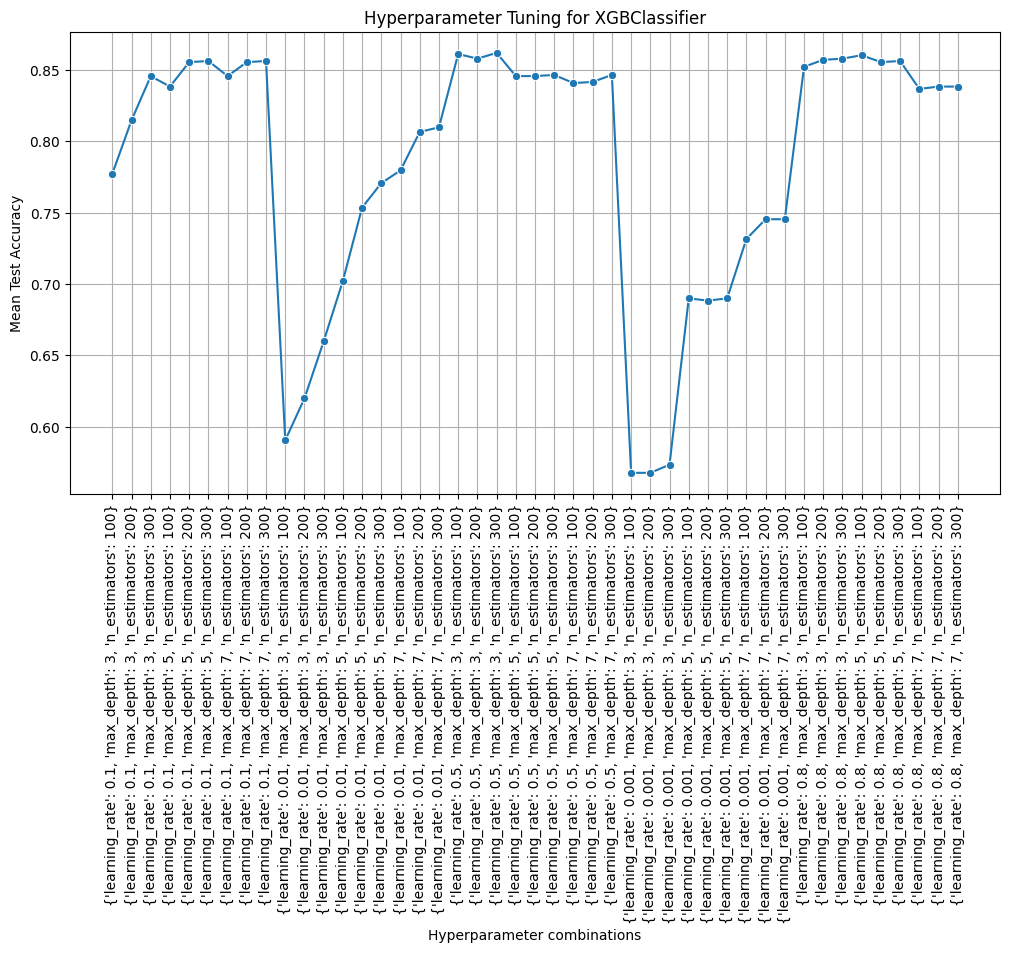

Model: GradientBoostingClassifier
Accuracy: 97.73 %
Precision: 97.76 %
Recall: 96.22 %
F1 score: 96.92 %
Sensitivity (Average): 96.22 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 74   0   2   0]
 [  2 147   0   0]
 [  0   1  61   0]
 [  2   0   0  19]]
Best Parameters: {'learning_rate': 0.8, 'n_estimators': 200}
**************************************************************
**************************************************************



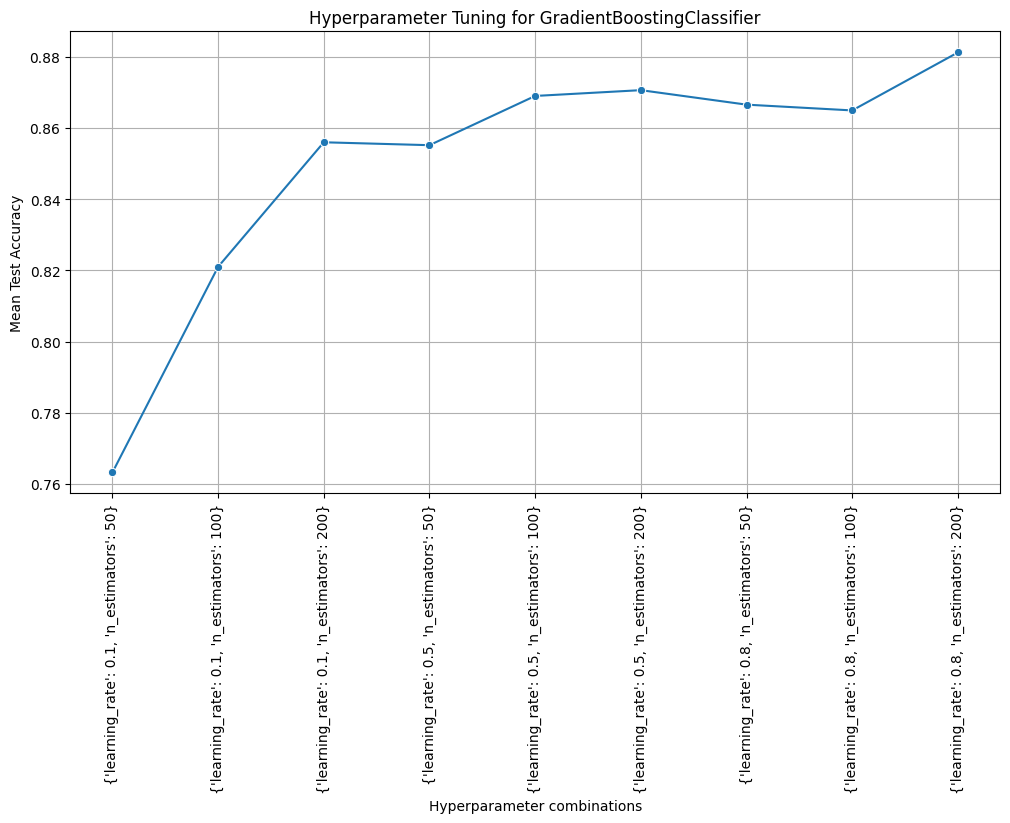

Model: DecisionTreeClassifier
Accuracy: 90.58 %
Precision: 91.5 %
Recall: 88.56 %
F1 score: 89.69 %
Sensitivity (Average): 88.56 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 65   5   6   0]
 [  8 138   3   0]
 [  0   3  59   0]
 [  1   1   2  17]]
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
**************************************************************
**************************************************************



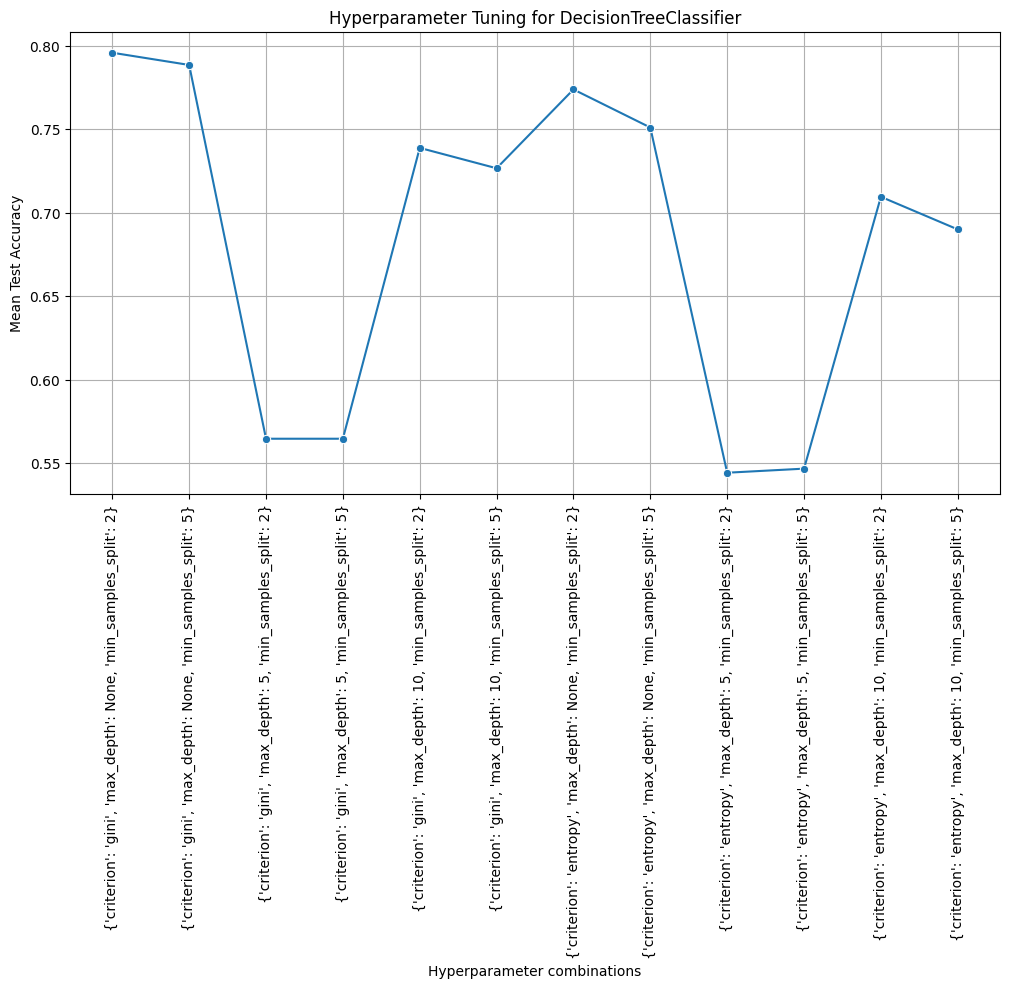

Model: RandomForestClassifier
Accuracy: 95.13 %
Precision: 96.29 %
Recall: 92.27 %
F1 score: 94.11 %
Sensitivity (Average): 92.27 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 70   4   2   0]
 [  0 148   1   0]
 [  1   4  57   0]
 [  2   1   0  18]]
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
**************************************************************
**************************************************************



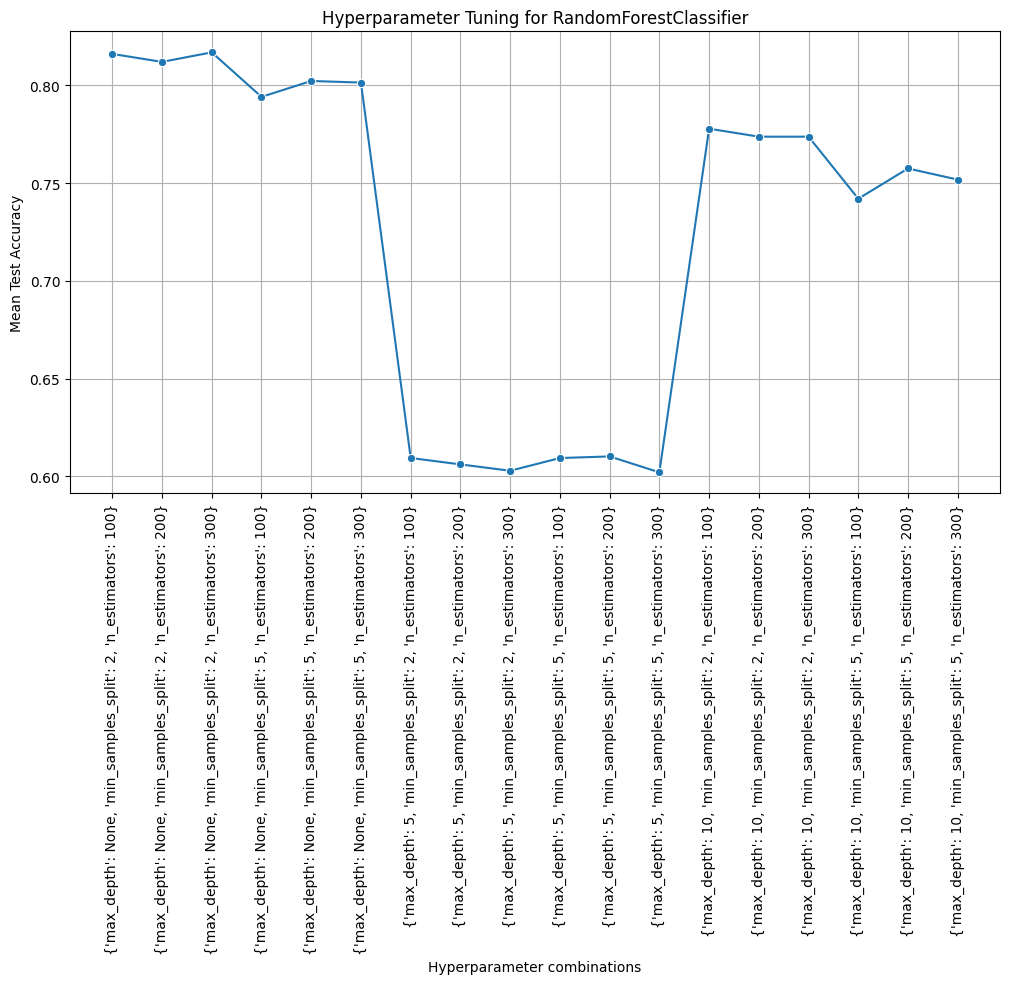

Model: KNeighborsClassifier
Accuracy: 86.04 %
Precision: 85.17 %
Recall: 82.92 %
F1 score: 83.77 %
Sensitivity (Average): 82.92 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 66   3   7   0]
 [  9 131   7   2]
 [  2   7  53   0]
 [  2   3   1  15]]
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
**************************************************************
**************************************************************



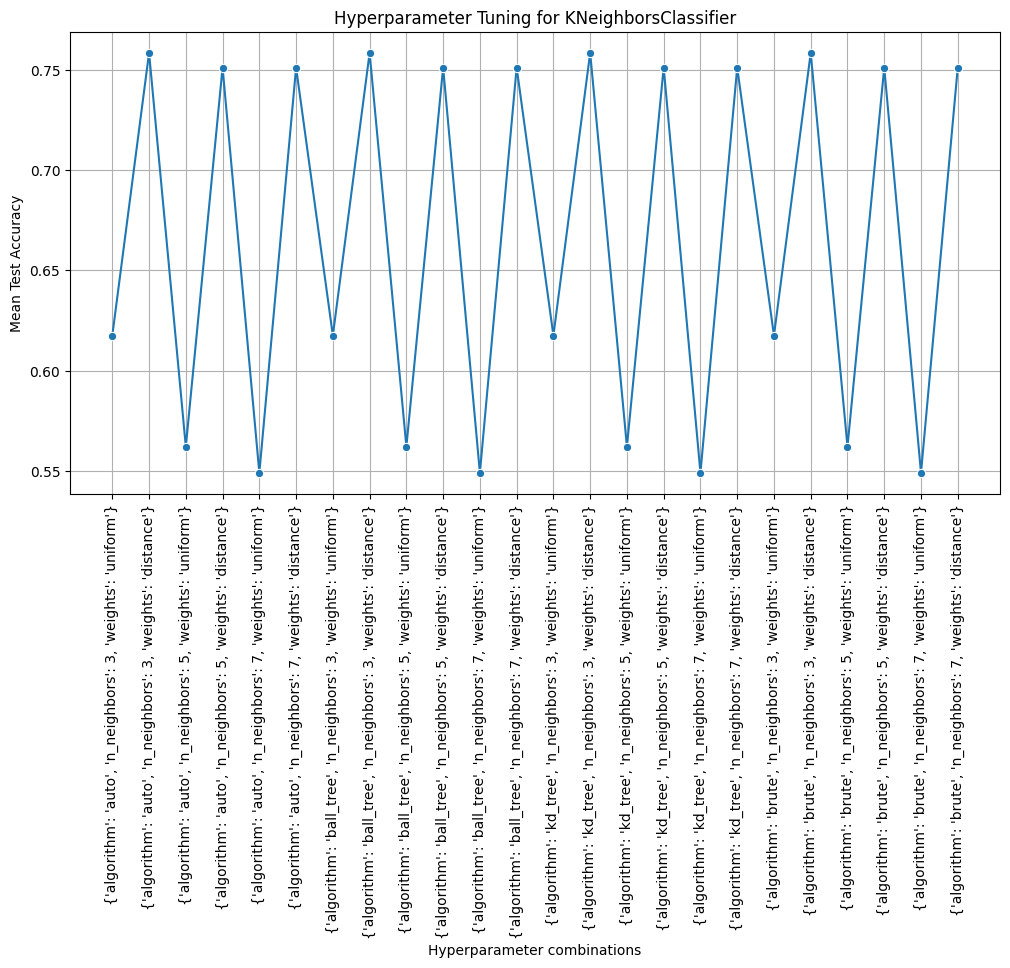

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Model: LogisticRegression
Accuracy: 47.4 %
Precision: 34.7 %
Recall: 25.84 %
F1 score: 20.28 %
Sensitivity (Average): 25.84 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[  1  74   1   0]
 [  9 140   0   0]
 [  5  52   5   0]
 [  0  21   0   0]]
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
**************************************************************
**************************************************************



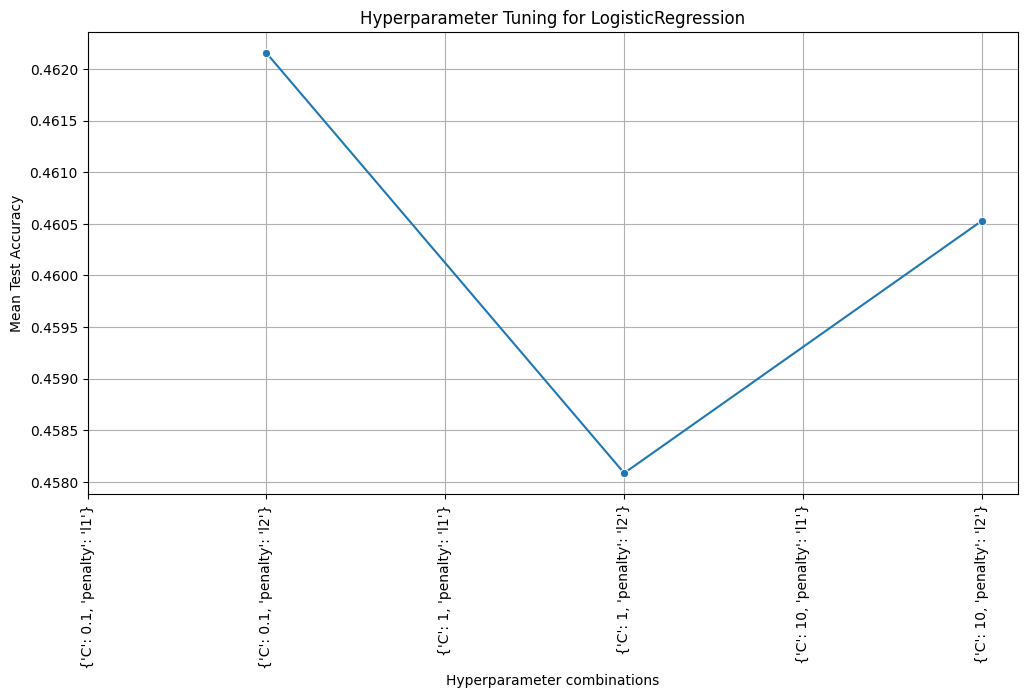

c:\Python312\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Python312\Lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base

Model: MLPClassifier
Accuracy: 56.82 %
Precision: 43.5 %
Recall: 36.18 %
F1 score: 35.22 %
Sensitivity (Average): 36.18 %
Specificity (Average): 0.0 %
Confusion matrix:
 [[ 16  52   8   0]
 [  8 141   0   0]
 [  3  41  18   0]
 [  3  16   2   0]]
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 100), 'solver': 'adam'}
**************************************************************
**************************************************************



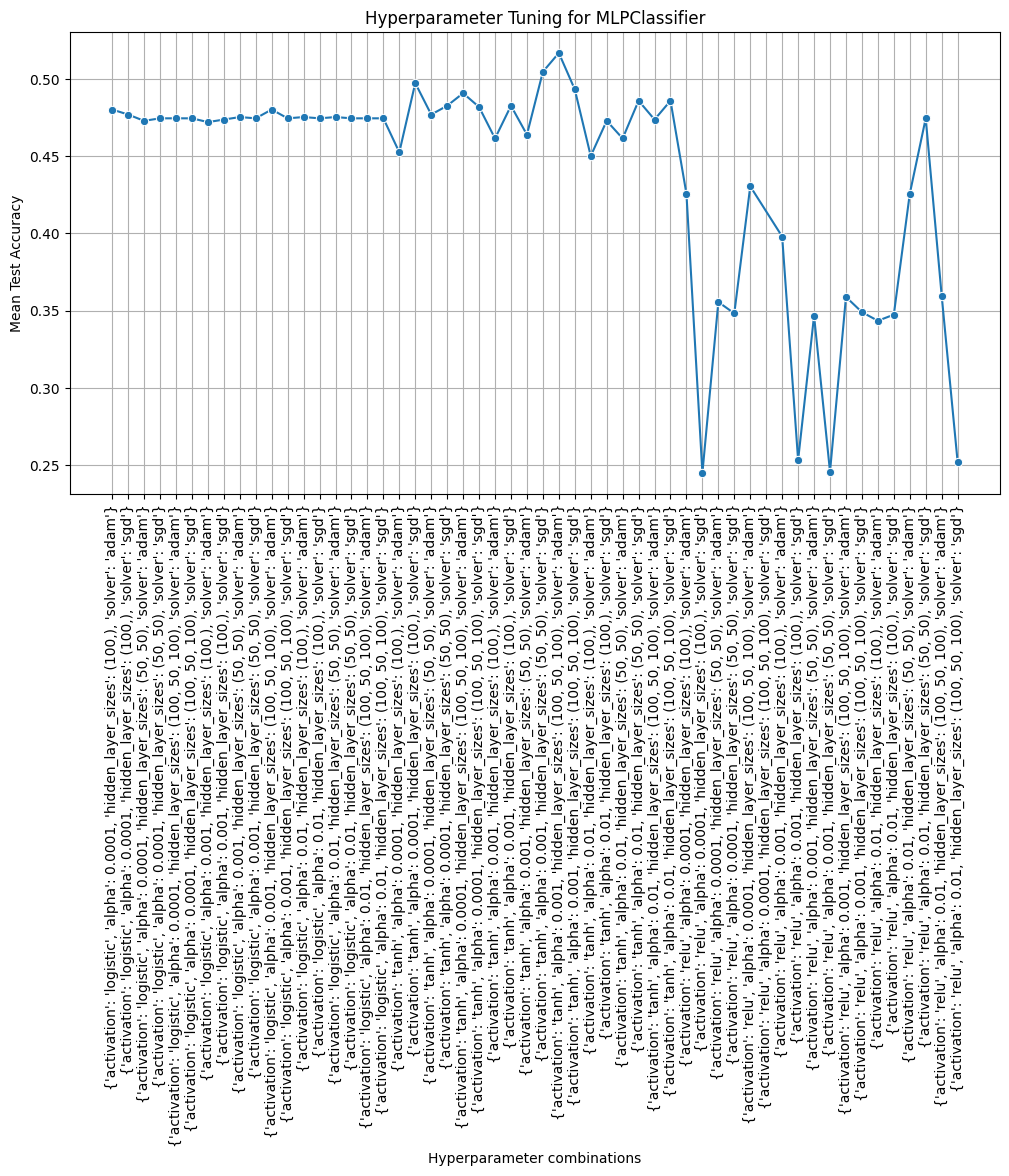

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_wc = main_df.drop("completion_status", axis=1).copy()
y_wc = main_df["completion_status"].copy()

X_train, X_test, y_train, y_test = train_test_split(X_wc, y_wc, test_size=0.2, random_state=101)

models = [
    {"model": xgb.XGBClassifier(), "params": {"n_estimators": [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.5, 0.001, 0.8]}},
    {"model": GradientBoostingClassifier(), "params": {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 0.8]}},
    {"model": DecisionTreeClassifier(), "params": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5], "criterion": ["gini", "entropy"]}},
   #{"model": SVC(), "params": {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}},
    {"model": RandomForestClassifier(), "params": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10], "min_samples_split": [2, 5]}},
    {"model": KNeighborsClassifier(), "params": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}},
    {"model": LogisticRegression(), "params": {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}},
    {"model": MLPClassifier(), "params": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.001, 0.01]}}
]

models_accuracy = []
model_names = []

for model_info in models:
    model = model_info["model"]
    params = model_info["params"]
    
    model_name = model.__class__.__name__
    
    grid_search = GridSearchCV(model, params, scoring="accuracy", cv=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    
    models_accuracy.append(acc)
    model_names.append(model_name)

    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sensitivity = recall
    specificity = (np.sum(np.diag(conf_matrix)) - np.sum(conf_matrix * np.eye(len(conf_matrix)))) / (np.sum(conf_matrix) - np.sum(np.diag(conf_matrix)))

    print(f"Model: {best_model.__class__.__name__}")
    print("Accuracy:", round(acc * 100, 2), '%')
    print("Precision:", round(precision * 100, 2), '%')
    print("Recall:", round(recall * 100, 2), '%')
    print("F1 score:", round(f1 * 100, 2), '%')
    print("Sensitivity (Average):", round(sensitivity * 100, 2), '%')
    print("Specificity (Average):", round(specificity * 100, 2), '%')
    print("Confusion matrix:\n", conf_matrix)
    print("Best Parameters:", grid_search.best_params_)
    print("**************************************************************")
    print("**************************************************************")
    print()
    
    results = grid_search.cv_results_
    mean_test_score = results['mean_test_score']
    params = results['params']
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=range(len(params)), y=mean_test_score, marker='o')
    plt.xticks(range(len(params)), [str(param) for param in params], rotation=90)
    plt.xlabel('Hyperparameter combinations')
    plt.ylabel('Mean Test Accuracy')
    plt.title(f'Hyperparameter Tuning for {model_name}')
    plt.grid(True)
    plt.show()
    
    if not os.path.exists("Models"):
        os.makedirs("Models")
    joblib.dump(best_model, os.path.join("Models", f"{best_model.__class__.__name__}_model.joblib"))


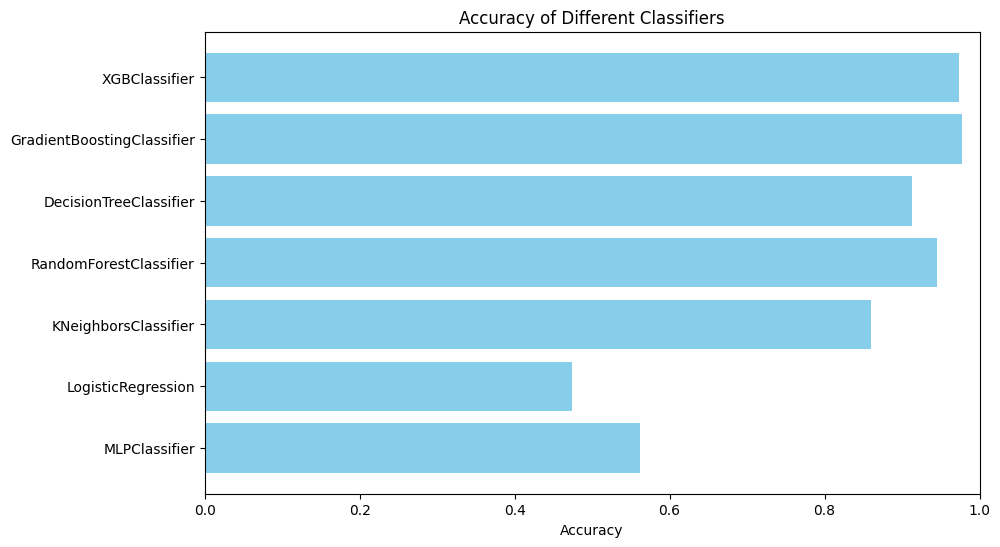

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, models_accuracy, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

### Test Data

In [20]:
test_df= pd.read_csv('raw_data/test.csv')

In [21]:
def model_evaluation (test_labels, test_predictions):
    accuracy = accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions,average='micro')
    recall = recall_score(test_labels, test_predictions,average='micro')
    f1 = f1_score(test_labels, test_predictions,average='micro')
    confusion_mat = confusion_matrix(test_labels, test_predictions)

    print("acc:", round(accuracy*100, 2), '%')
    print("Precision:", round(precision*100, 2), '%')
    print("Recall:", round(recall*100, 2), '%')
    print("F1 score:", round(f1*100, 2), '%')
    print("Confusion matrix:\n", confusion_mat)
    print(Fore.RED + Style.BRIGHT +"**************************************************************")
    print(Fore.BLUE +Style.BRIGHT +"**************************************************************")
    print(Fore.MAGENTA +Style.BRIGHT +"**************************************************************")
    print(Style.RESET_ALL)

In [22]:
for col in test_df.columns:
    if col not in main_df.columns:
        test_df.drop(col, axis=1, inplace=True)

numerical_cols = [col for col in test_df.columns if test_df[col].dtype != 'object']
non_numerical_cols = [col for col in test_df.columns if test_df[col].dtype == 'object']

for col in numerical_cols:
    fill_value = mean_values.get(col)
    if fill_value is not None:
        test_df[col] = test_df[col].fillna(fill_value)

for col in non_numerical_cols:
    fill_value = mode_values.get(col)
    if fill_value is not None:
        test_df[col] = test_df[col].fillna(fill_value)

for col in numerical_cols:
    if test_df[col].isna().sum() > 0:
        test_df[col] = test_df[col].fillna(test_df[col].mean())

for col in non_numerical_cols:
    if test_df[col].isna().sum() > 0:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

for col in non_numerical_cols:
    label_object = label_encoders.get(col)
    if label_object:
        test_df[col] = test_df[col].apply(lambda x: label_object.get(x, -1))

folder_path = "Models"

xgb_model = joblib.load(os.path.join(folder_path, "XGBClassifier_model.joblib"))
gradien_model = joblib.load(os.path.join(folder_path, "GradientBoostingClassifier_model.joblib"))
dt_model = joblib.load(os.path.join(folder_path, "DecisionTreeClassifier_model.joblib"))
rf_model = joblib.load(os.path.join(folder_path, "RandomForestClassifier_model.joblib"))

models = [xgb_model, gradien_model, dt_model, rf_model]
model_names = ["XGBClassifier", "GradientBoostingClassifier", "DecisionTreeClassifier", "RandomForestClassifier"]

decode_mapping = {
    2: 'Paid off with renewal',
    1: 'Paid in full',
    0: 'Default',
    3: 'Paid via discounted payoff'
}

predictions_folder = "Predictions"

if not os.path.exists(predictions_folder):
    os.makedirs(predictions_folder)

for model, model_name in zip(models, model_names):
    test_df_copy = test_df.copy()
    y_pred = model.predict(test_df_copy)
    test_df_copy['completion_status'] = y_pred
    test_df_copy['completion_status'] = test_df_copy['completion_status'].map(decode_mapping)
    
    prediction_file_path = os.path.join(predictions_folder, f"{model_name}_predictions.csv")
    
    test_df_copy.to_csv(prediction_file_path, index=False)
    
    print(f"Predictions saved for {model_name} at: {prediction_file_path}")

Predictions saved for XGBClassifier at: Predictions\XGBClassifier_predictions.csv
Predictions saved for GradientBoostingClassifier at: Predictions\GradientBoostingClassifier_predictions.csv
Predictions saved for DecisionTreeClassifier at: Predictions\DecisionTreeClassifier_predictions.csv
Predictions saved for RandomForestClassifier at: Predictions\RandomForestClassifier_predictions.csv
